MATPLOTLIB: scatter plots

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import ast
#reading the csv file
data = pd.read_csv(r"C:\Users\nikhi\Downloads\data_jobs.csv")

# data cleanup
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])

data['job_skills'] = data['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
data = data[data['job_title_short'] == 'Data Analyst']

In [17]:
df_exploded = data.explode('job_skills')
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending = False).head(10)

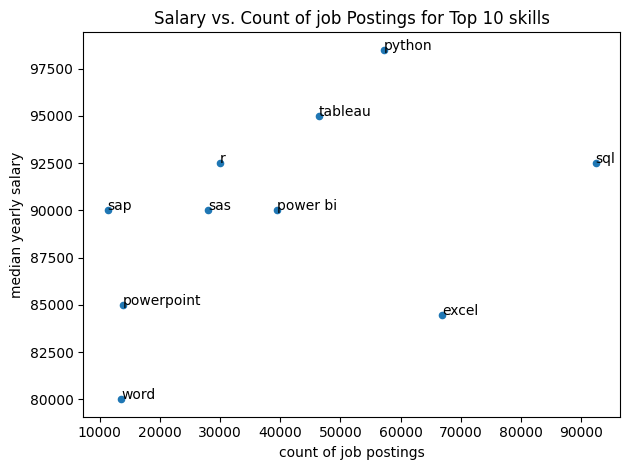

In [18]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.xlabel('count of job postings')
plt.ylabel('median yearly salary')
plt.title('Salary vs. Count of job Postings for Top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(
        skills_stats['skill_count'].iloc[i],       # X position
        skills_stats['median_salary'].iloc[i],     # Y position
        txt                                         # Text to display
)
    
plt.show()